<a href="https://colab.research.google.com/github/fursuf1/Credit-Card-Fraud-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [ ]:
# Import the necessary module requred to upload the json file containing the user's Kaggle username and API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"smwares","key":"9d4510dd154cd14320d909c8ea824582"}'}

In [ ]:
# Make the directory necessar to place the Kaggle json credentials file. RUN THIS ONLY ONCE PER SESSION
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the CC data set from Kaggle
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

100%|██████████| 143M/143M [00:02<00:00, 59.2MB/s]


In [ ]:
# Import data as DataFrame
cc = pd.read_csv('./credit-card-fraud-detection-dataset-2023/creditcard_2023.csv', index_col=0)

In [ ]:
# Preview the dataframe
cc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [ ]:
# Get some descriptive stats on the dataframe
cc.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


V1


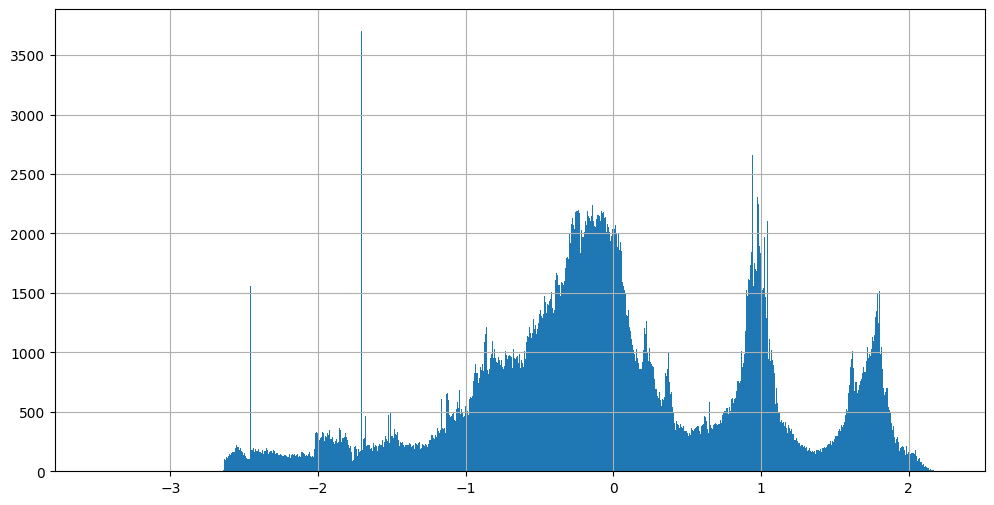

V2


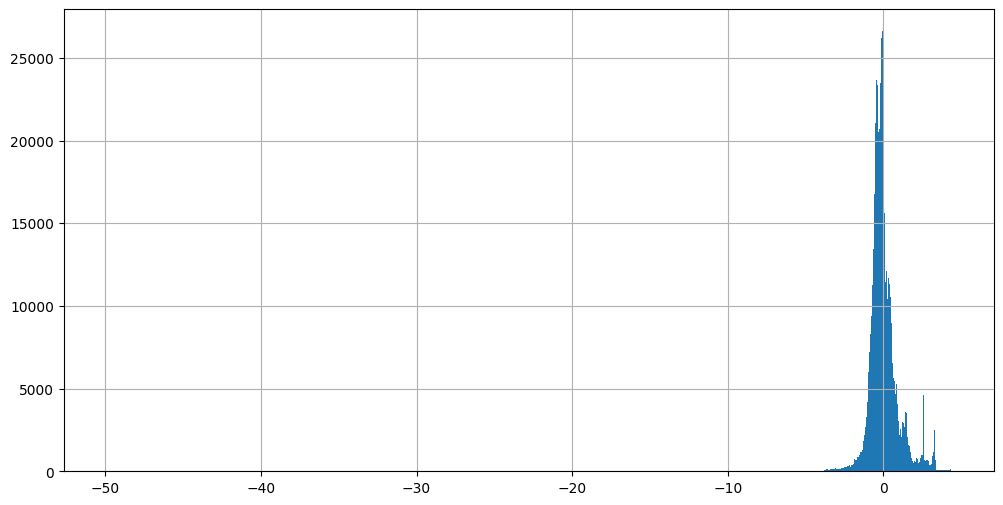

V3


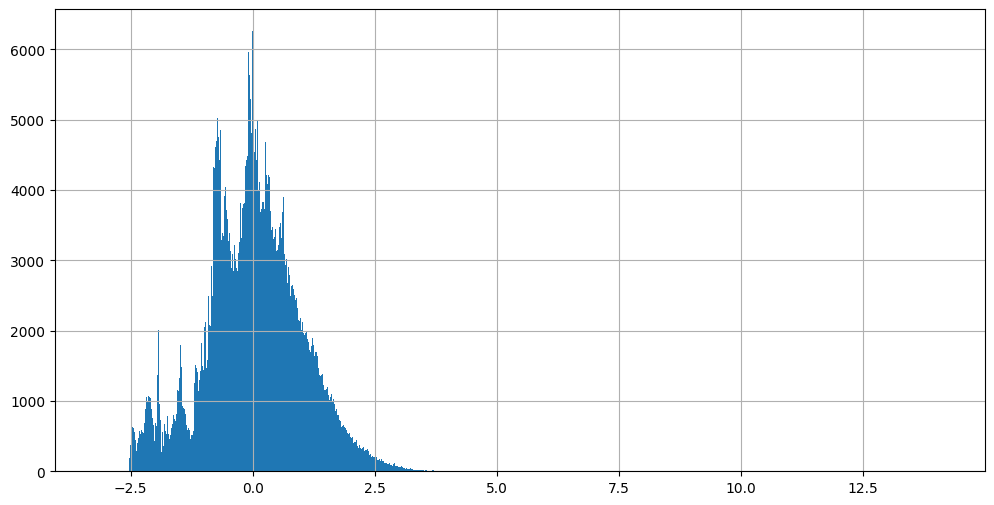

V4


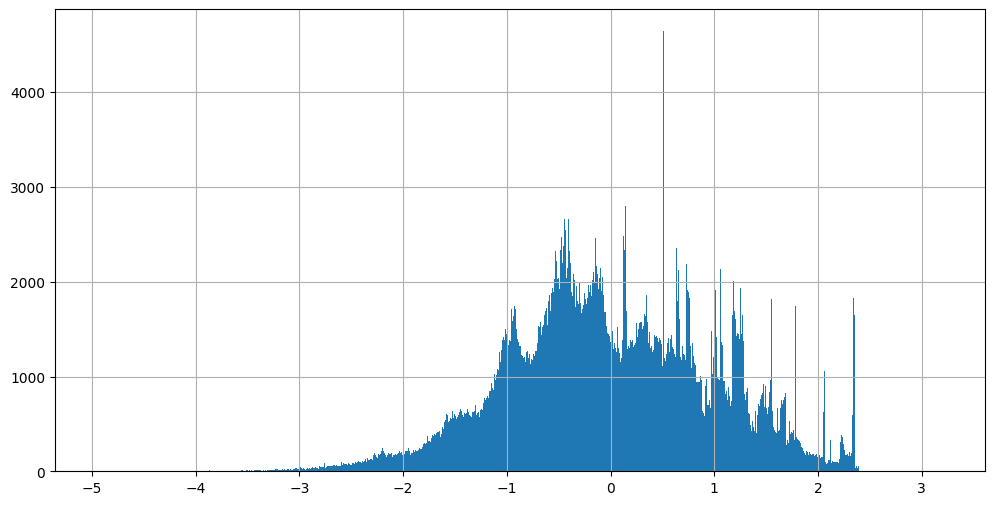

V5


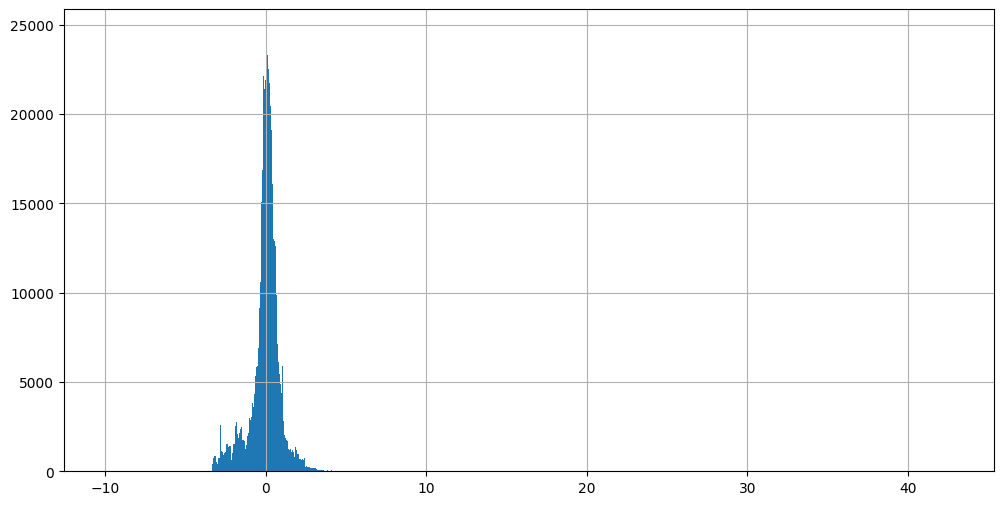

V6


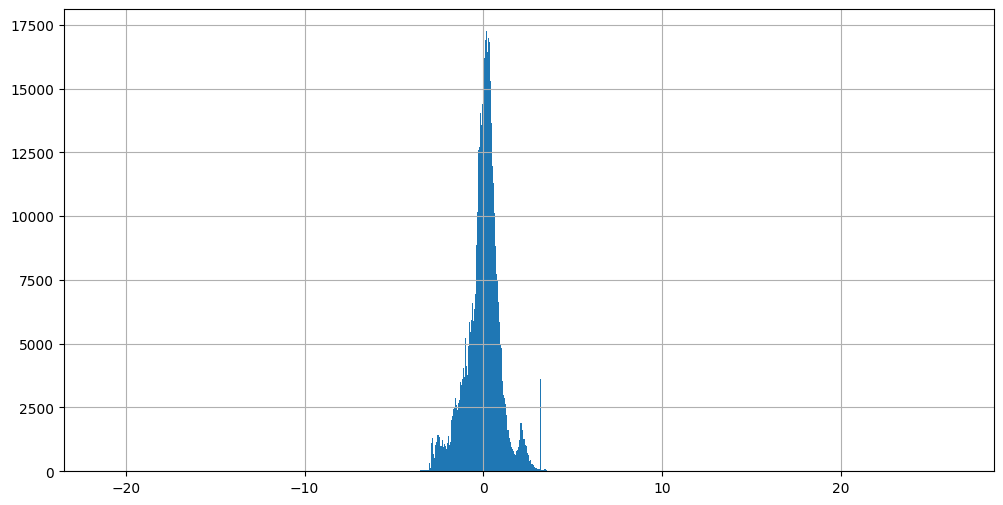

V7


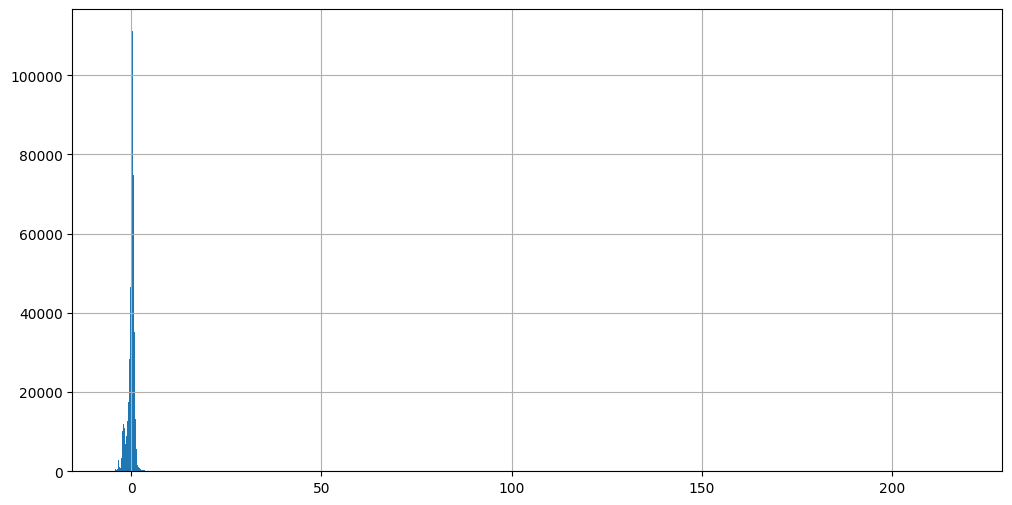

V8


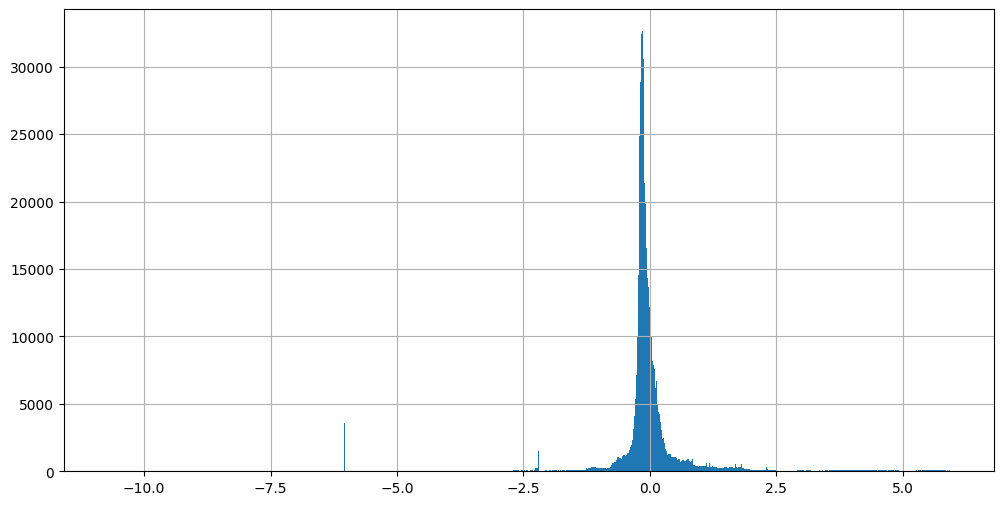

V9


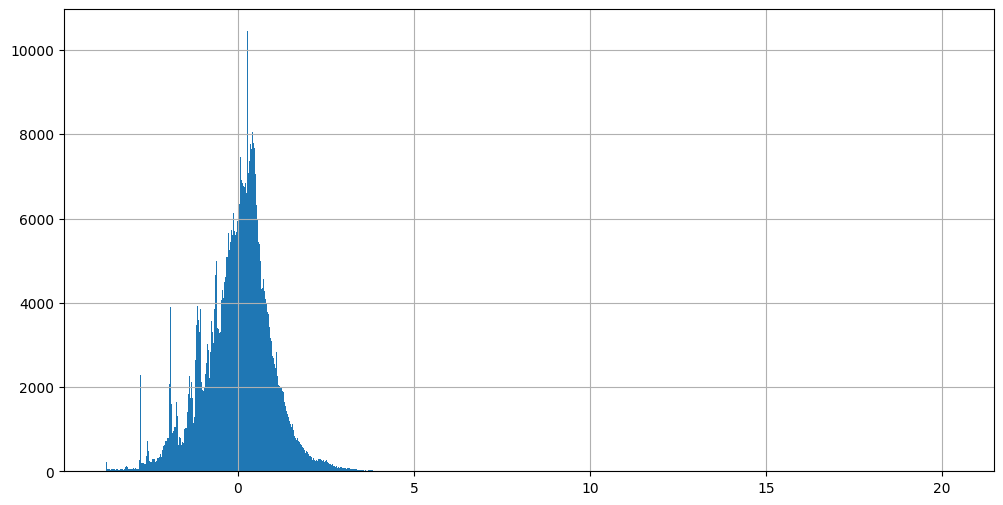

V10


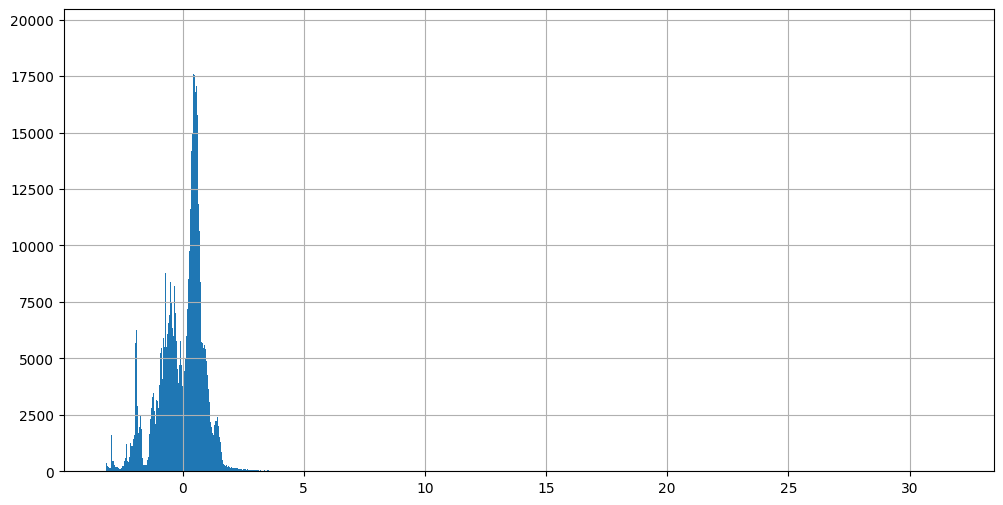

V11


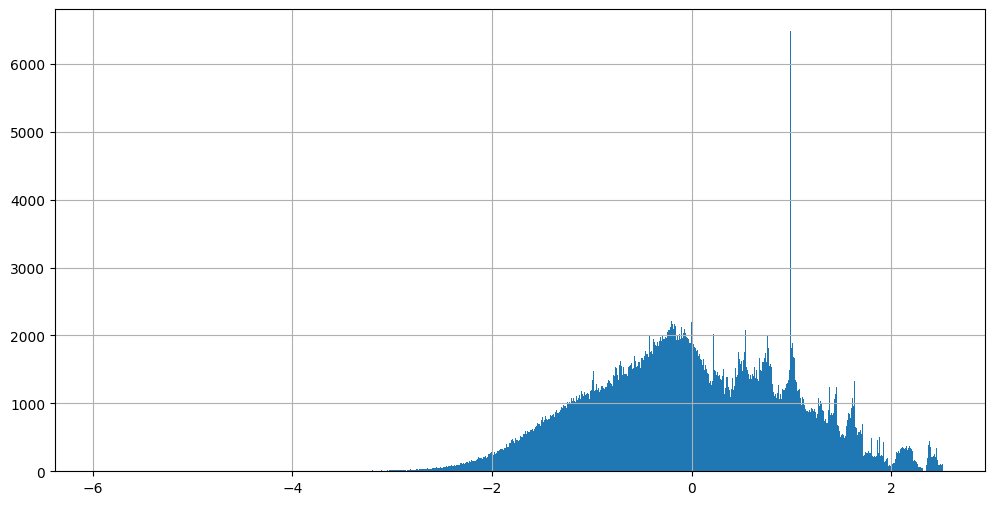

V12


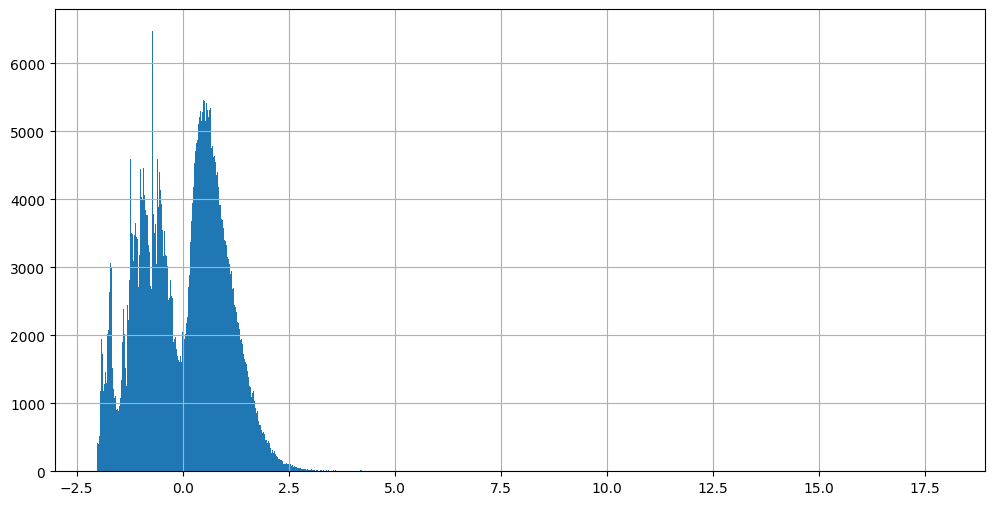

V13


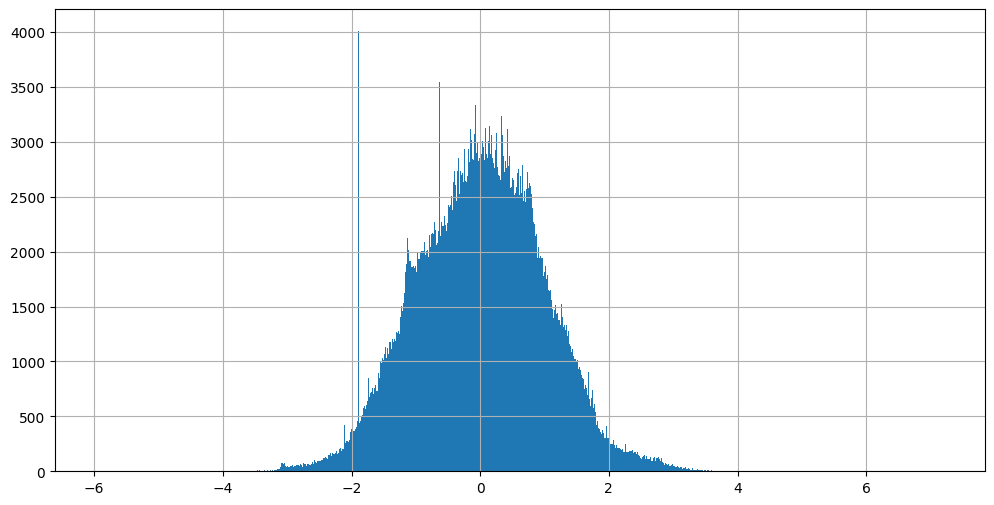

V14


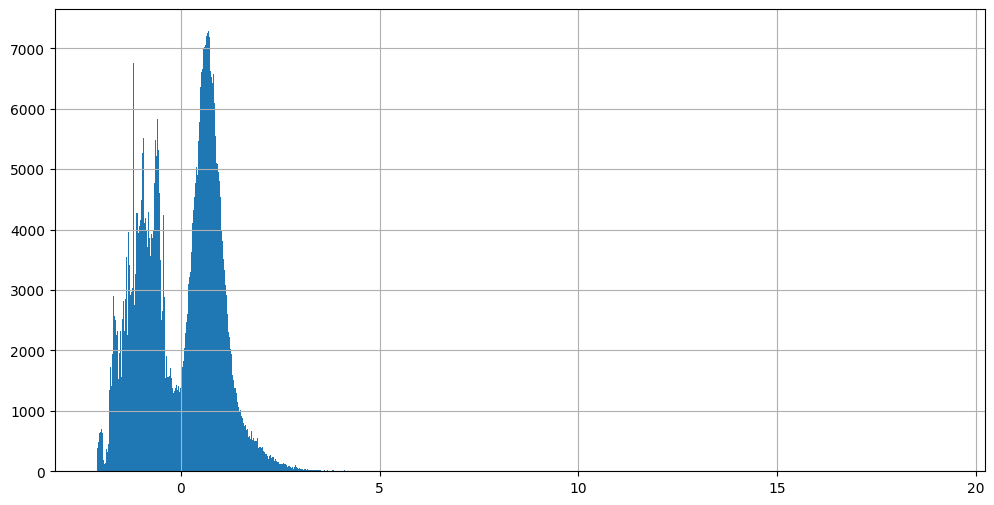

V15


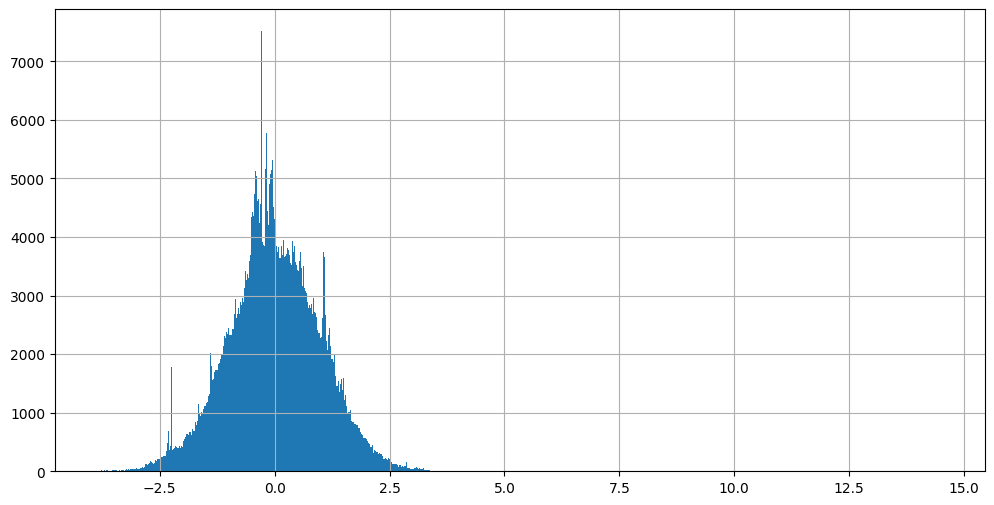

V16


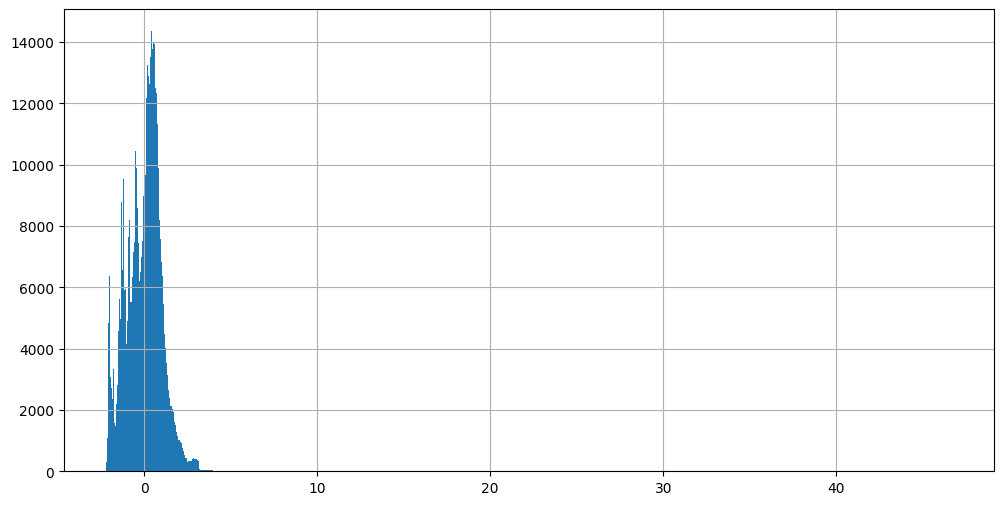

V17


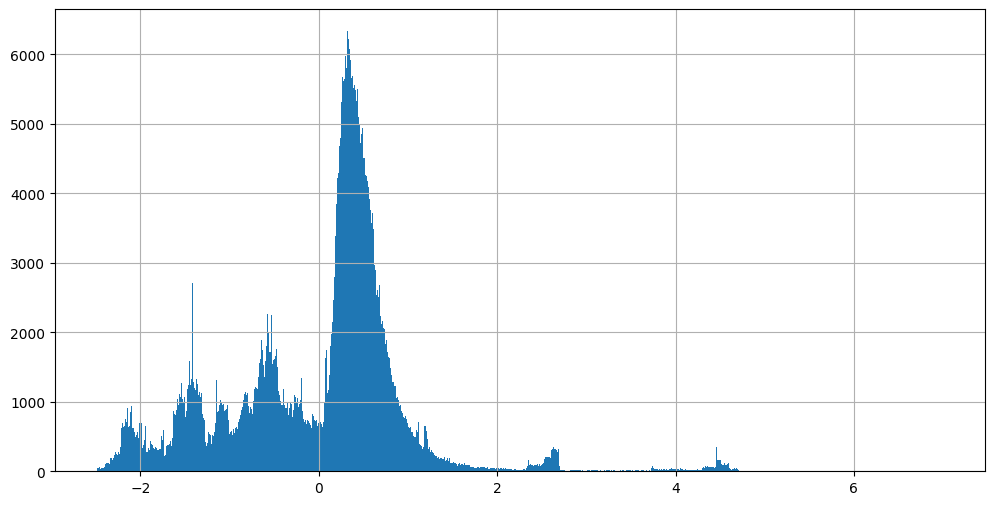

V18


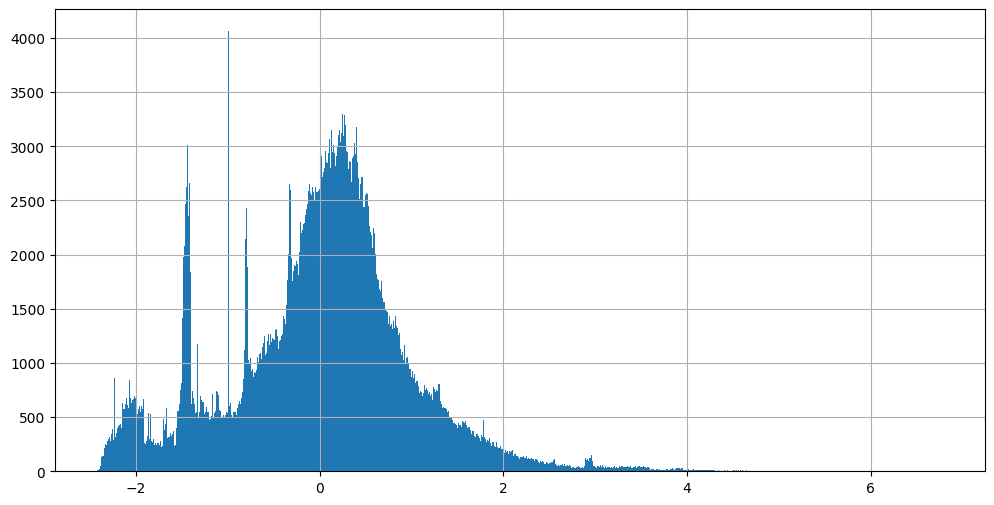

V19


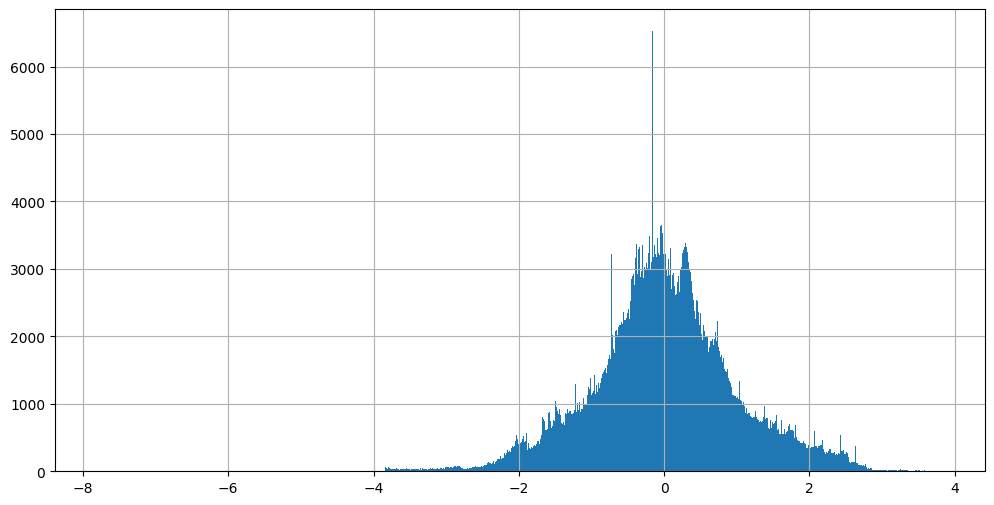

V20


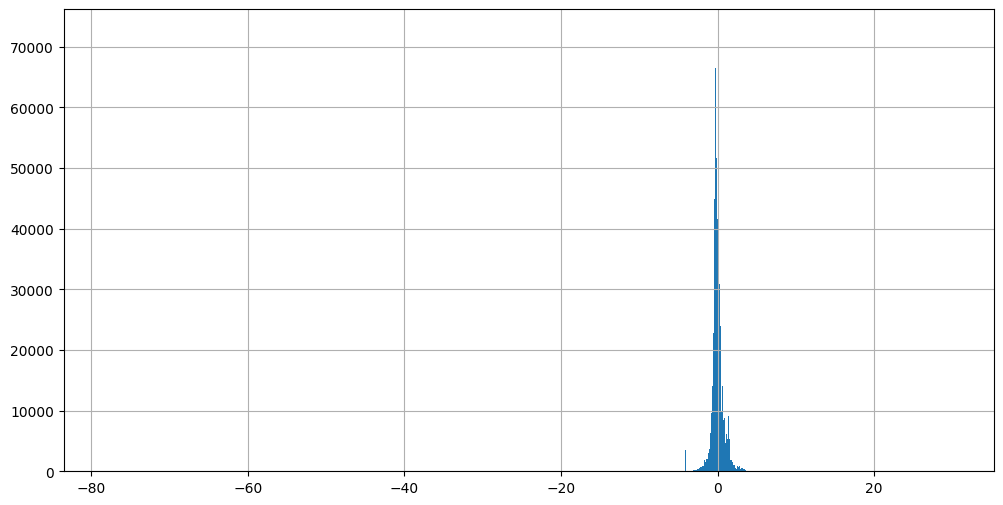

V21


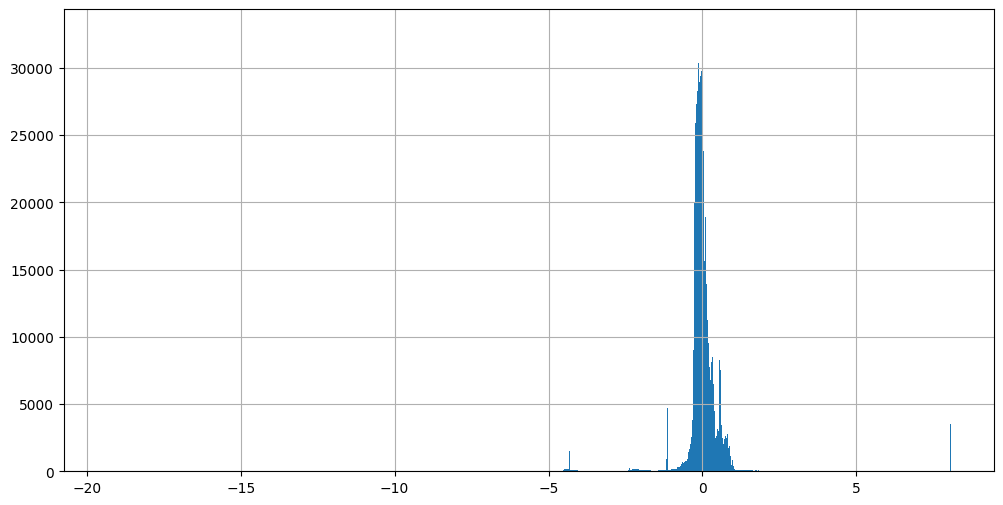

V22


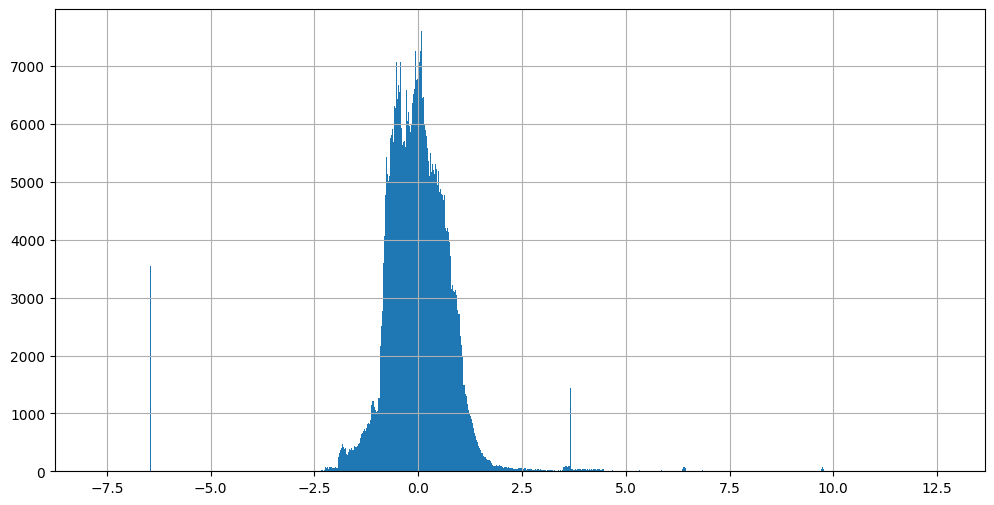

V23


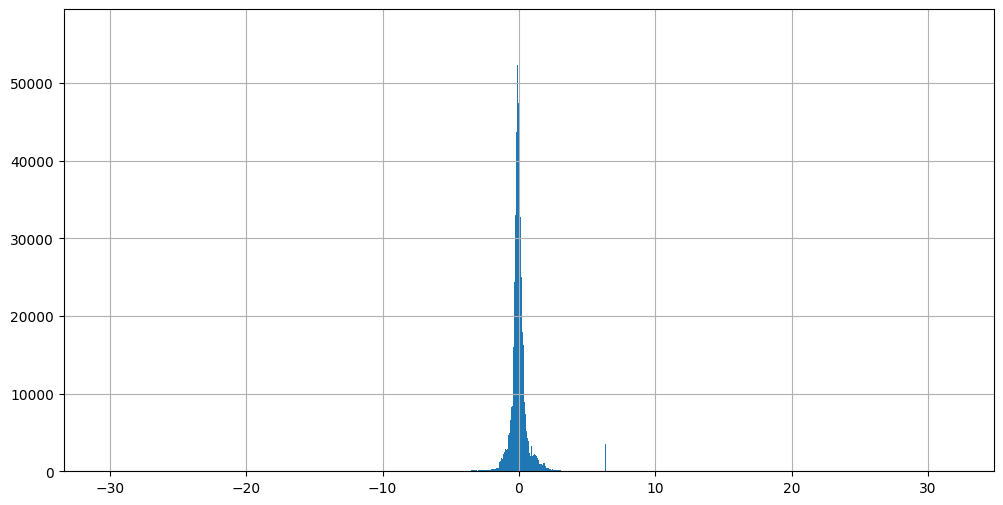

V24


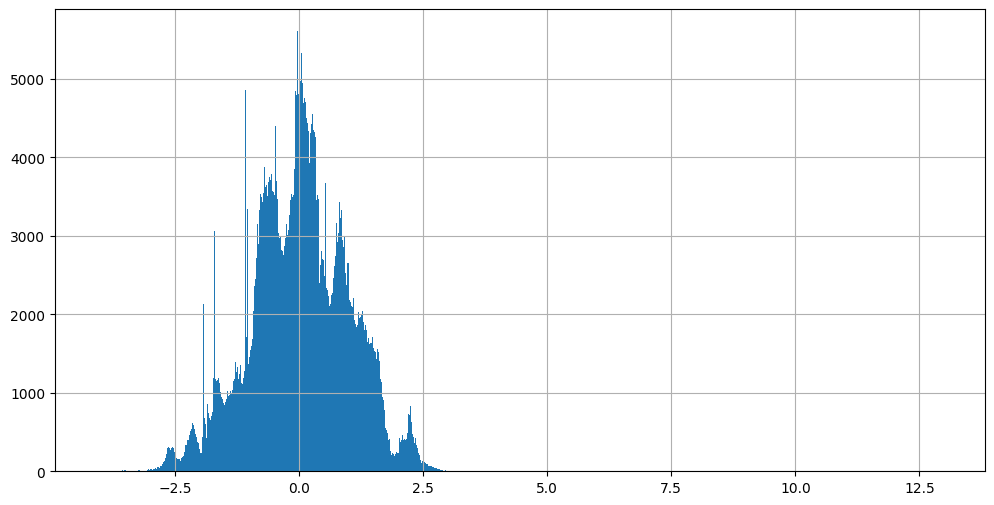

V25


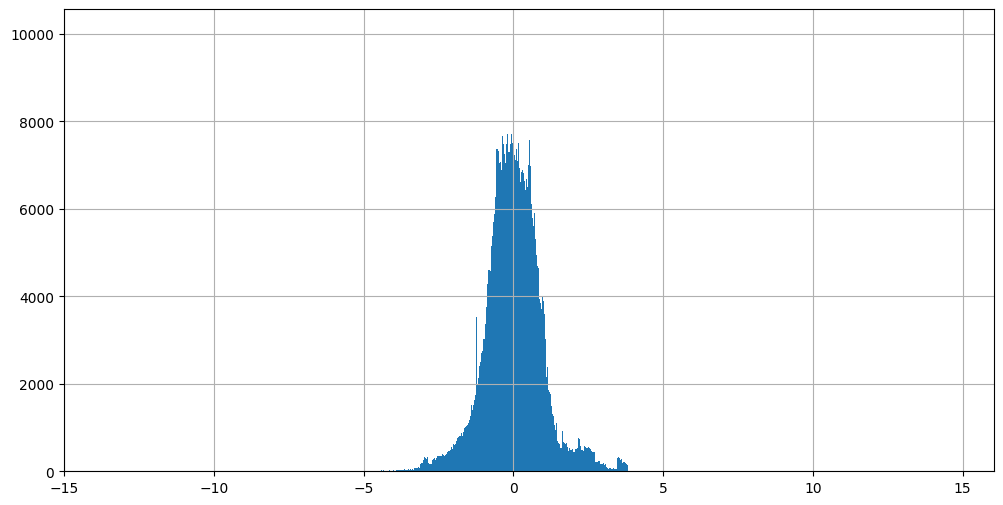

V26


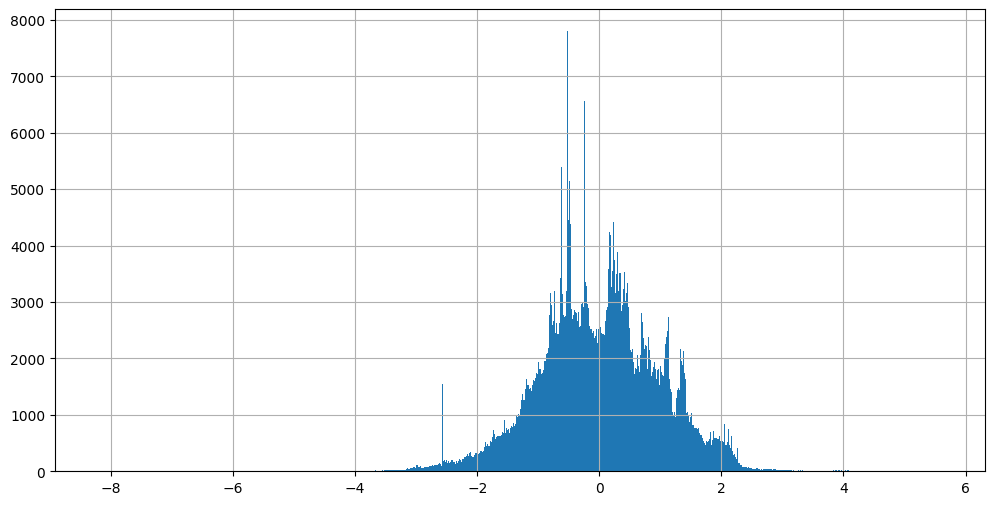

V27


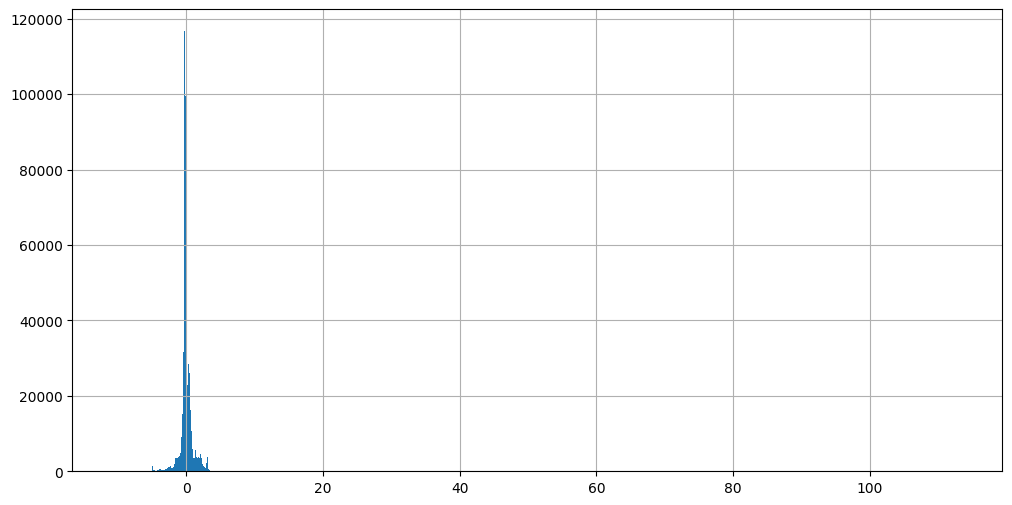

V28


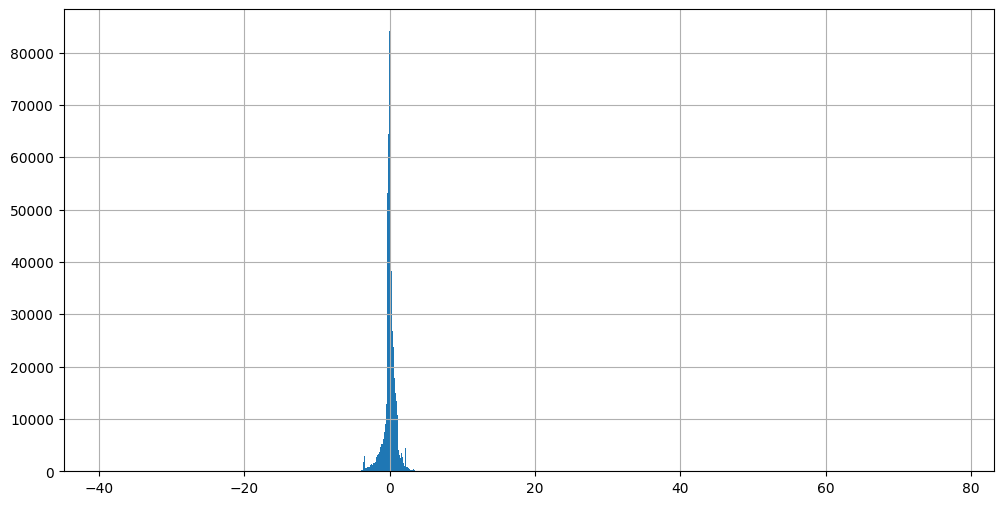

Amount


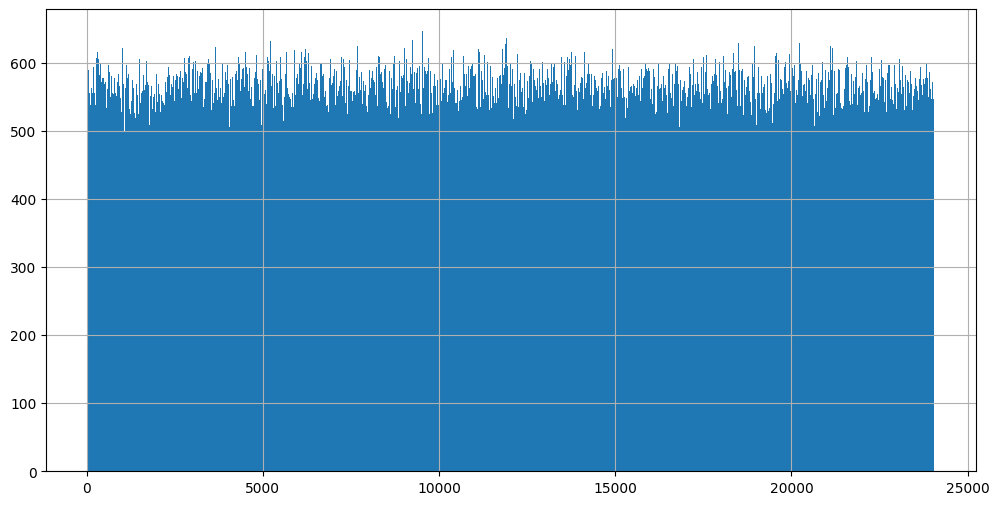

Class


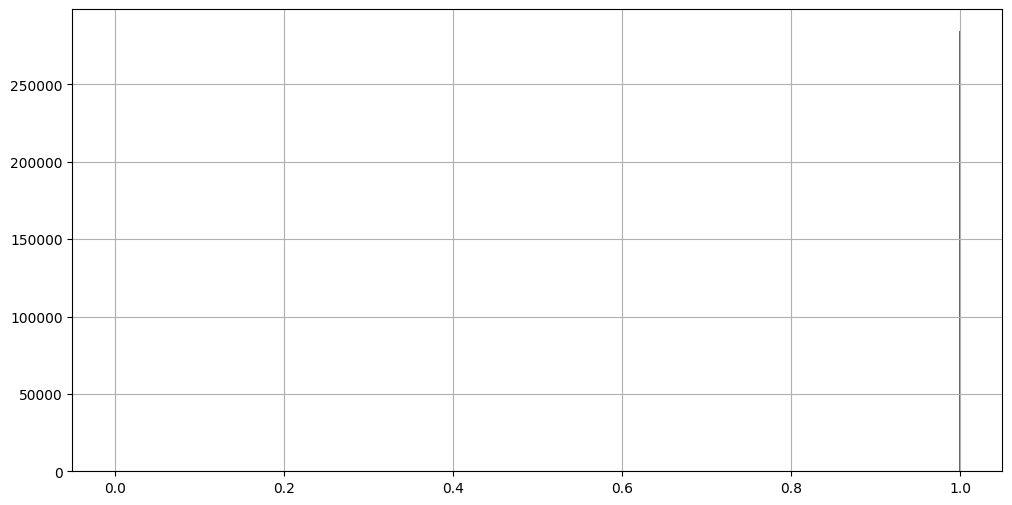

In [ ]:
# Print out a histogram for each column
# Set a bin size, can be changed as necessary
bin_size = 1000

for column in cc.columns:
  print(column)
  cc[column].hist(bins=bin_size, figsize=(12,6))
  plt.show()

In [ ]:
# Create two subsets from the dataframe, one that only has rows that had no frauds, one that only had frauds
cc_valid = cc[cc['Class'] == 0][cc.columns[:-1]]
cc_fraud = cc[cc['Class'] == 1][cc.columns[:-1]]

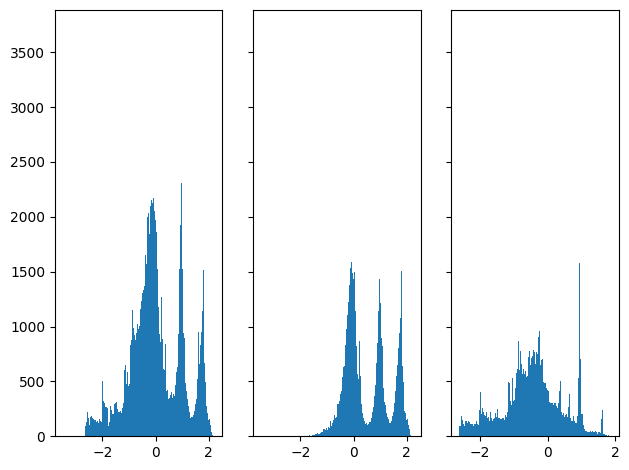

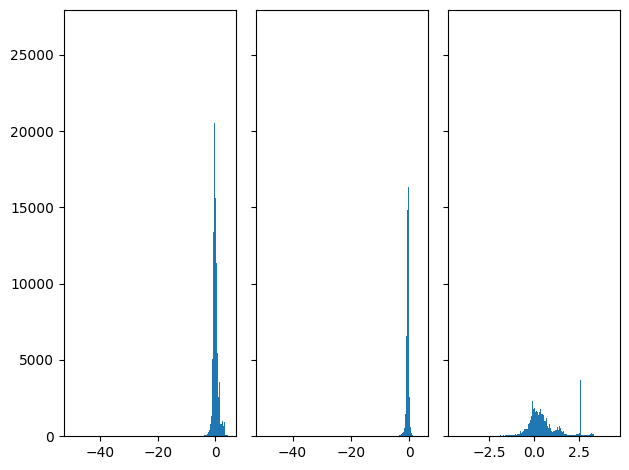

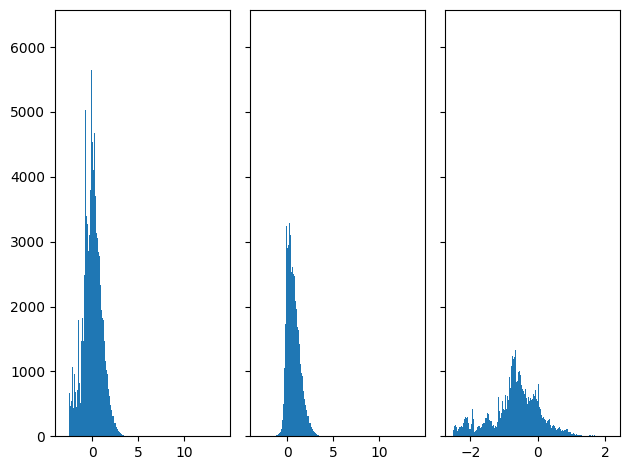

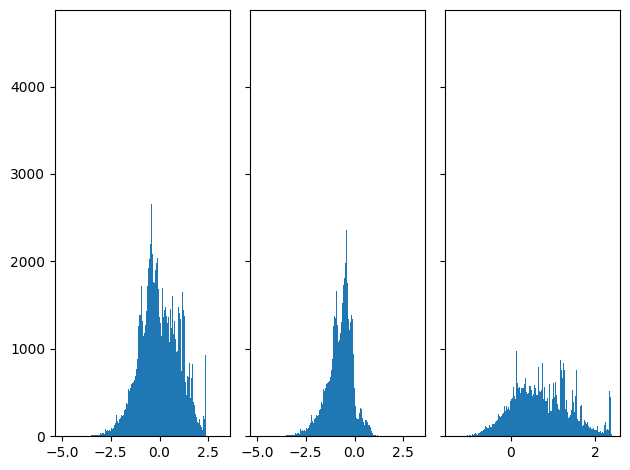

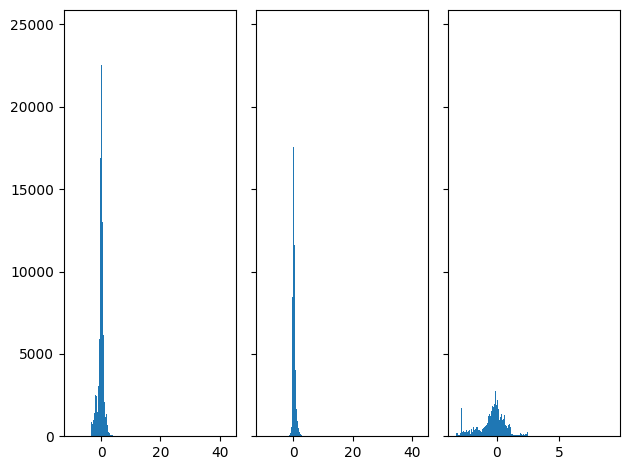

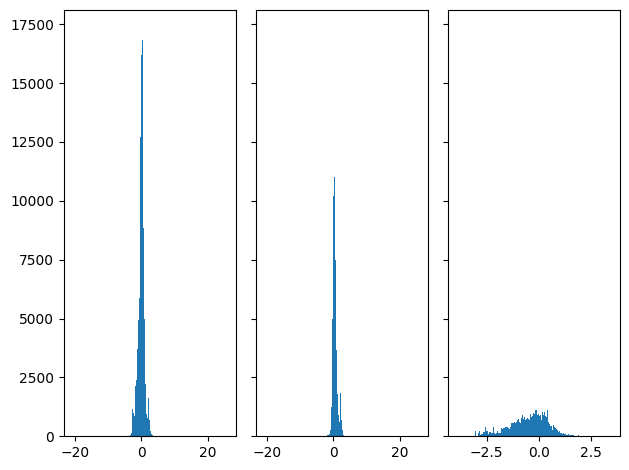

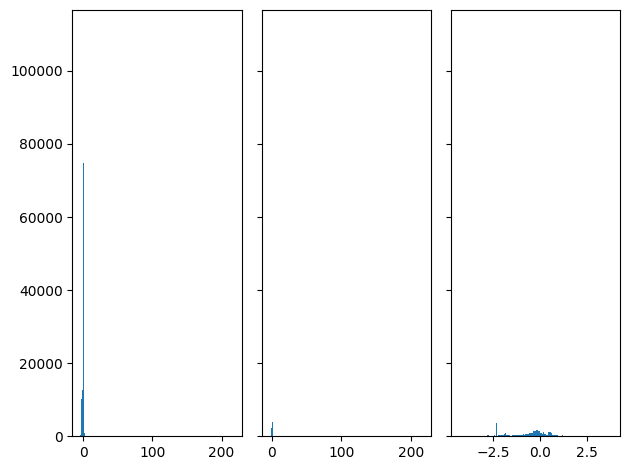

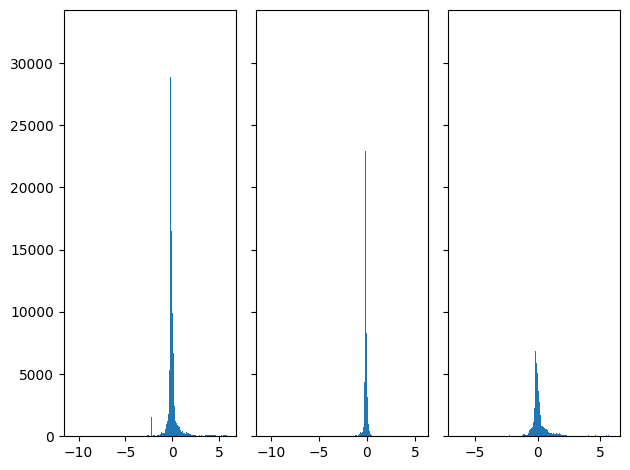

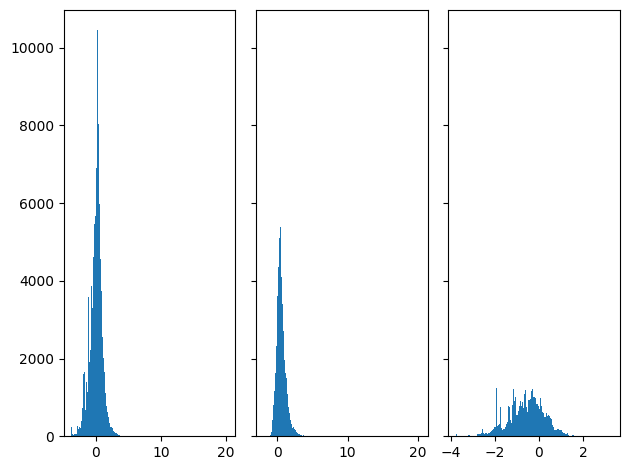

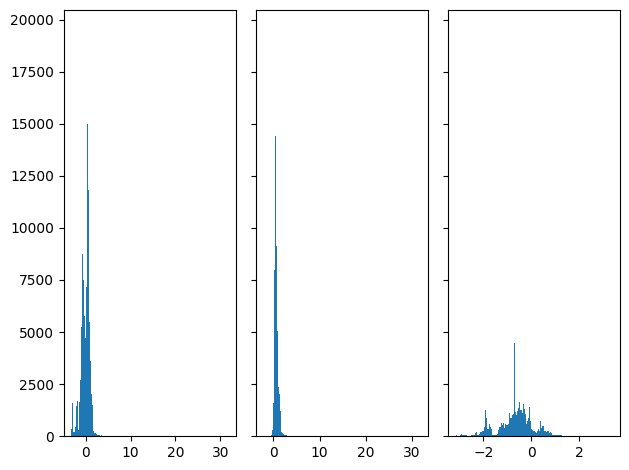

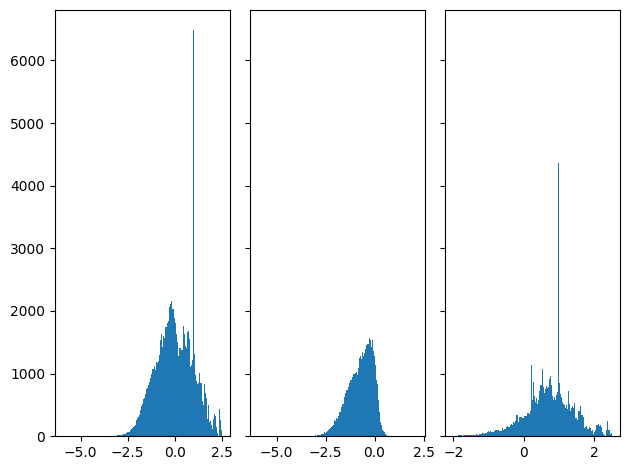

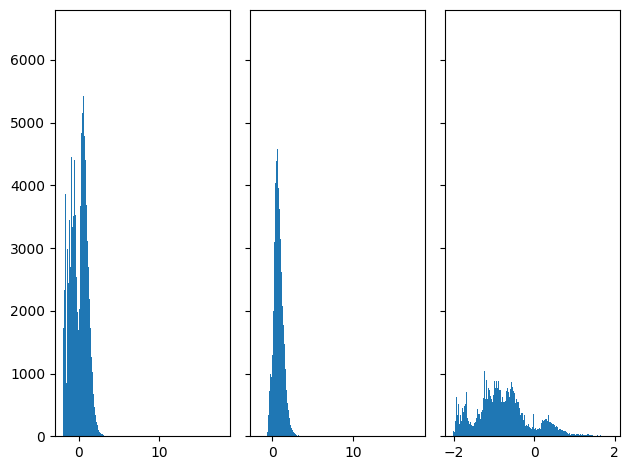

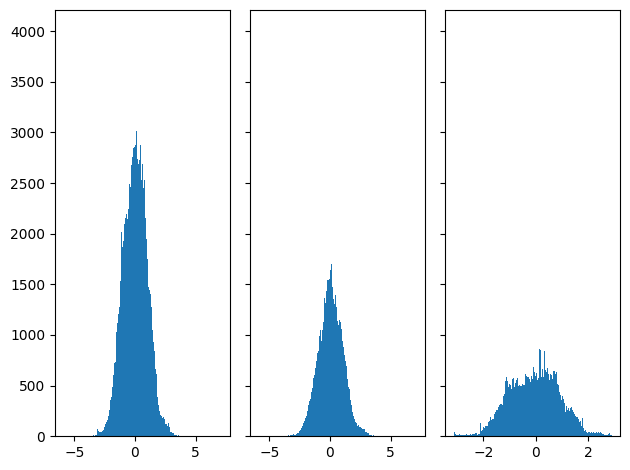

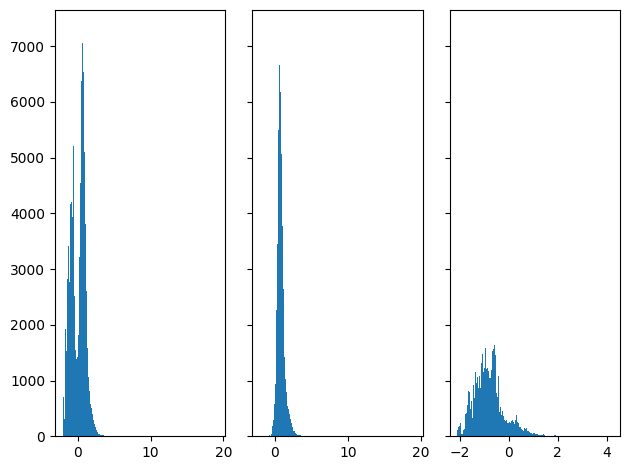

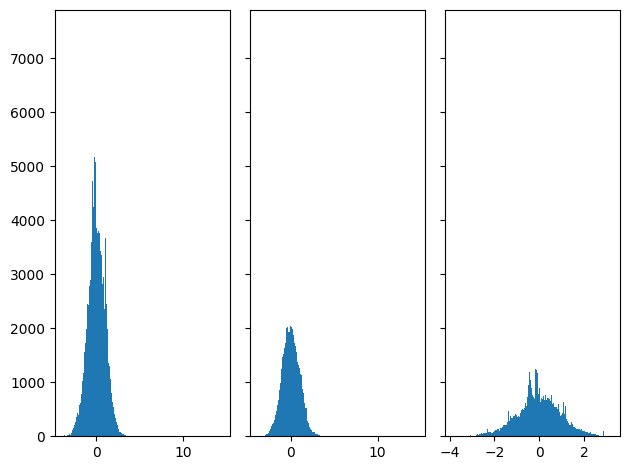

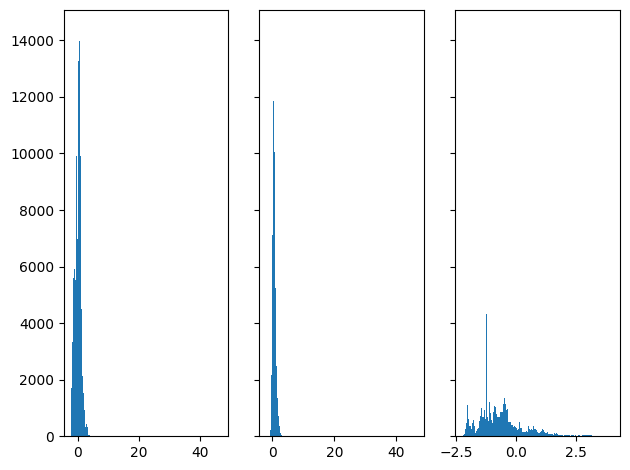

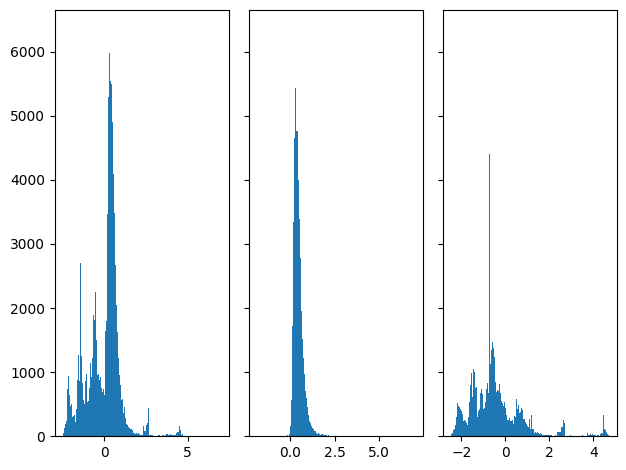

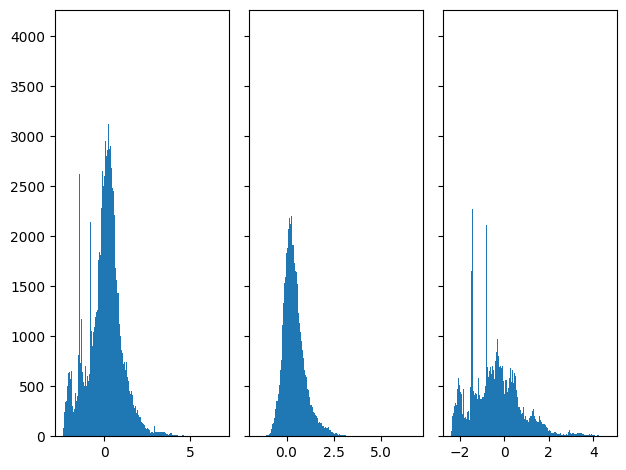

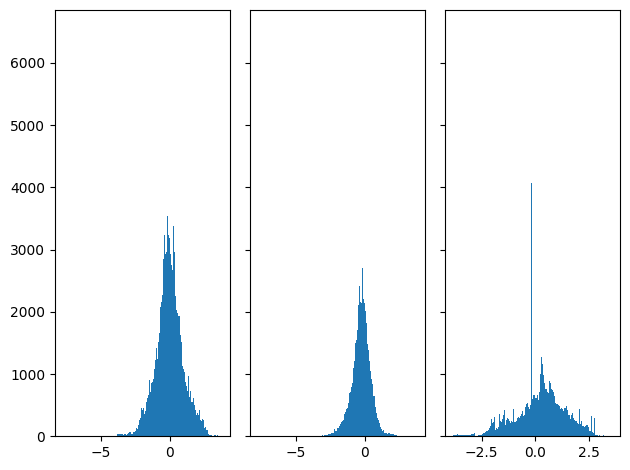

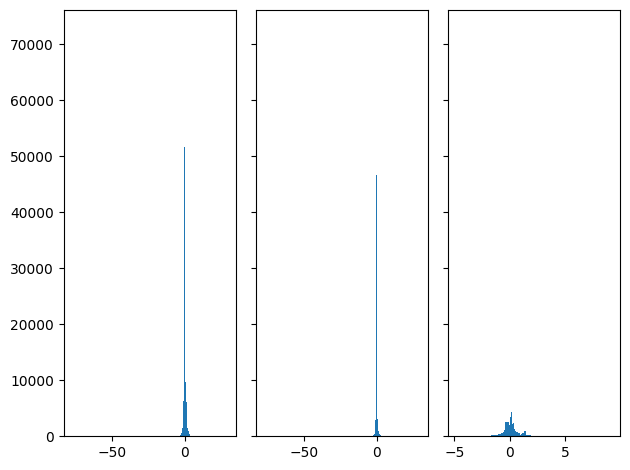

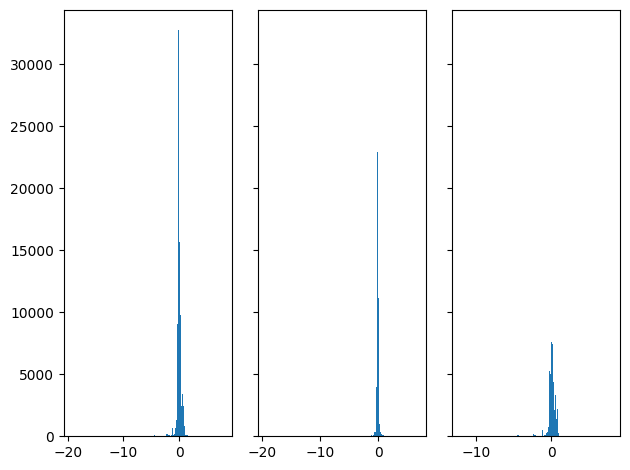

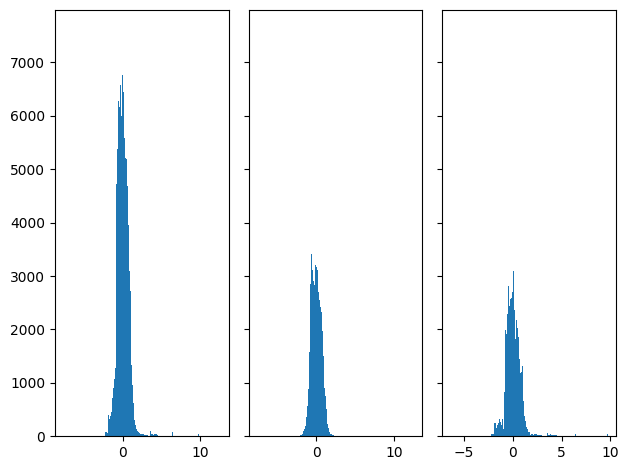

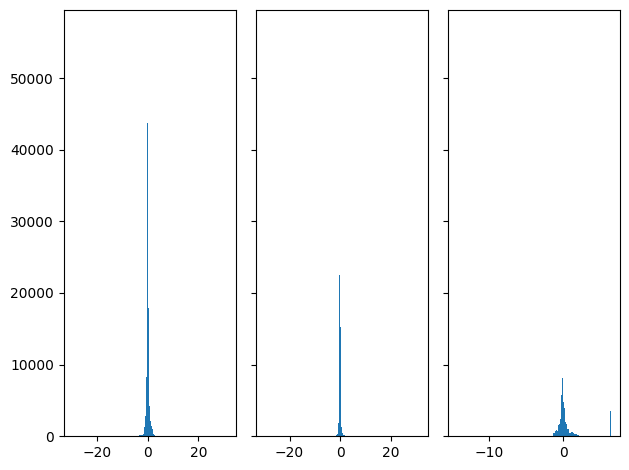

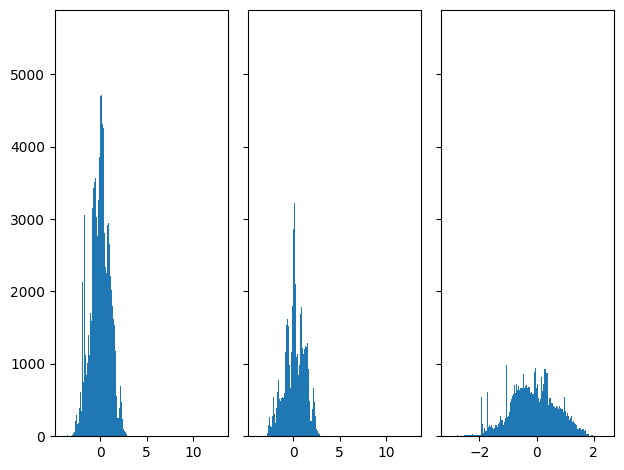

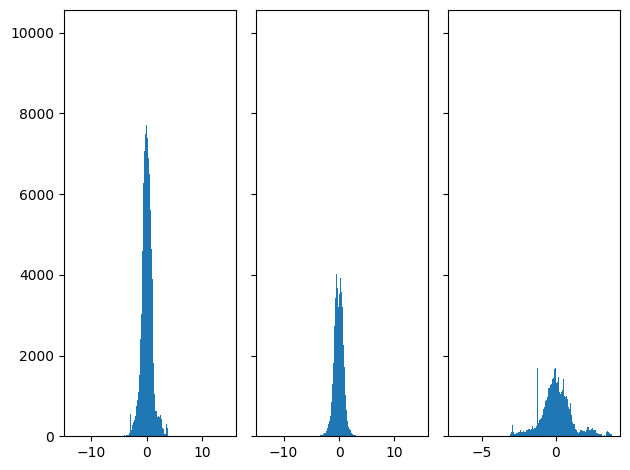

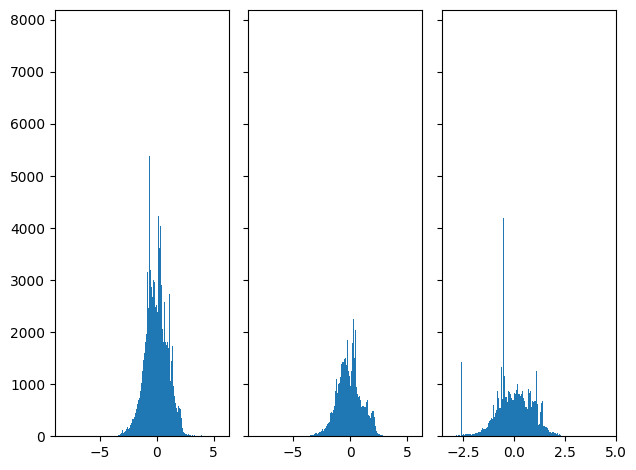

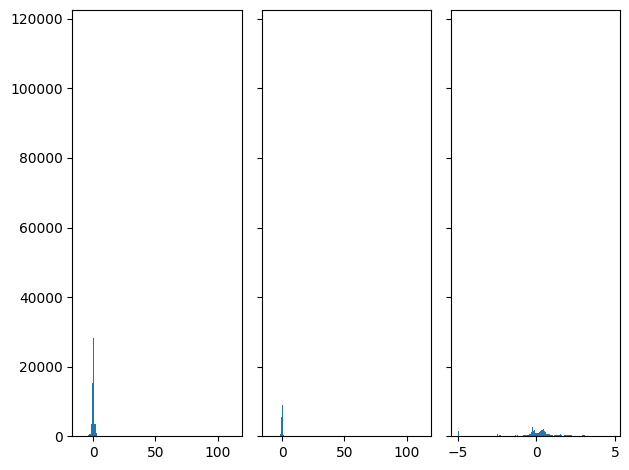

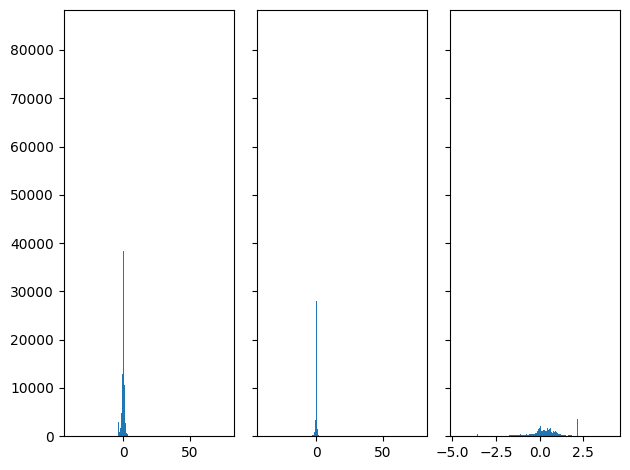

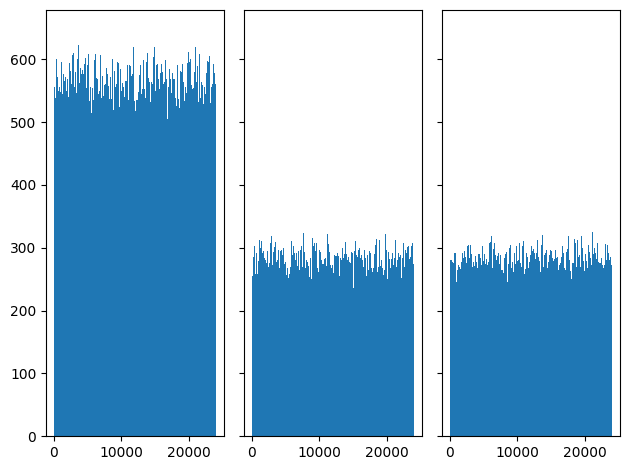

In [ ]:
# Print out histograms side-by-side to compare distributions
for column in cc.columns[:-1]:
  fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
  axs[0].hist(cc[column], bins=bin_size)
  axs[1].hist(cc_valid[column], bins=bin_size)
  axs[2].hist(cc_fraud[column], bins=bin_size)
  plt.show()

In [ ]:
# Create a correlation matrix, using Kendall-Tau method since data doesn't follow normal distribution
cc_corr = cc.corr(method='kendall', numeric_only=True)
cc_corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.440435,0.325787,-0.349963,0.374643,0.226699,0.375211,-0.276071,0.381964,0.470525,...,-0.307855,-0.074671,0.039424,-0.011318,0.049826,-0.007343,-0.174884,-0.111351,-0.001105,-0.421285
V2,-0.440435,1.000000,-0.496328,0.514648,-0.236952,-0.381212,-0.370787,0.248891,-0.465481,-0.541470,...,0.255414,-0.030869,-0.050612,-0.044091,0.031008,0.069564,0.218852,0.204474,0.001428,0.518305
V3,0.325787,-0.496328,1.000000,-0.531148,0.309720,0.428409,0.471550,-0.244216,0.483552,0.568434,...,-0.331866,-0.008549,0.005188,0.068349,-0.018632,-0.073784,-0.225916,-0.108929,-0.001762,-0.599627
V4,-0.349963,0.514648,-0.531148,1.000000,-0.293106,-0.328510,-0.433047,0.250532,-0.499387,-0.520709,...,0.294388,0.017392,-0.027920,-0.066562,0.035848,0.091297,0.239092,0.152564,0.001666,0.635953
V5,0.374643,-0.236952,0.309720,-0.293106,1.000000,0.153790,0.492399,-0.268188,0.295798,0.353676,...,-0.291243,-0.101698,-0.078071,-0.074746,0.058042,0.009247,-0.106168,-0.014941,-0.000430,-0.320910
V6,0.226699,-0.381212,0.428409,-0.328510,0.153790,1.000000,0.278122,-0.196076,0.341586,0.398386,...,-0.250923,0.071246,0.133975,-0.029657,-0.083824,-0.064711,-0.176264,-0.152057,-0.000221,-0.388881
V7,0.375211,-0.370787,0.471550,-0.433047,0.492399,0.278122,1.000000,-0.405518,0.399035,0.465697,...,-0.354110,-0.052023,-0.012166,0.022801,0.002901,-0.051976,-0.254661,-0.117617,-0.000023,-0.486960
V8,-0.276071,0.248891,-0.244216,0.250532,-0.268188,-0.196076,-0.405518,1.000000,-0.298535,-0.330406,...,0.370502,-0.010048,-0.077335,-0.024942,0.035711,0.089497,0.271641,0.142822,0.001801,0.242081
V9,0.381964,-0.465481,0.483552,-0.499387,0.295798,0.341586,0.399035,-0.298535,1.000000,0.446576,...,-0.286448,-0.050789,0.068948,0.049683,-0.039290,-0.105670,-0.243661,-0.144983,-0.001217,-0.516349
V10,0.470525,-0.541470,0.568434,-0.520709,0.353676,0.398386,0.465697,-0.330406,0.446576,1.000000,...,-0.354086,-0.024321,0.066754,0.059403,-0.034861,-0.064609,-0.286078,-0.184538,-0.001380,-0.615872


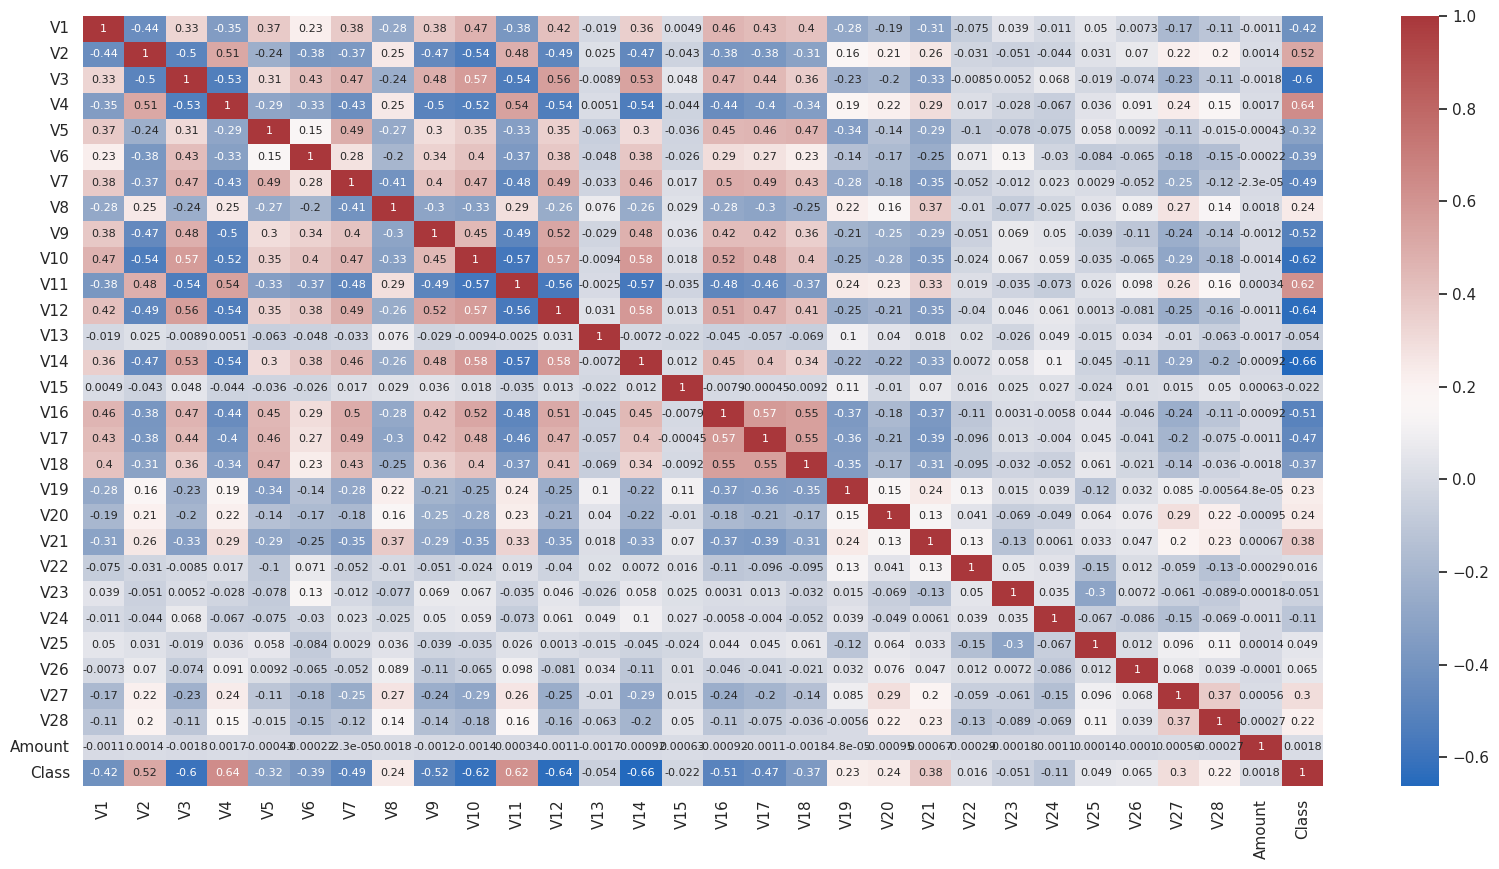

In [ ]:
# Display a heatmap of the correlation matrix
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(cc_corr, annot=True, annot_kws={'size': 8}, cmap='vlag')
plt.show()